In [1]:
from pprint import pprint

import matplotlib.pyplot as plt

import bluemira.codes.plasmod as plasmod
from bluemira.base.config import Configuration
from bluemira.base.logs import set_log_level

# Configuring the PLASMOD solver

PLASMOD is one of the codes bluemira can use to compliment a reactor design.
As with any of the external codes bluemira uses, a solver object is created.
The solver object abstracts away most of the complexities of running different
programs within bluemira.

## Setting up

### Logging
To enable debug logging run the below cell

In [2]:
set_log_level("DEBUG")

### Binary Location
Firstly if plasmod is not in your system path we need to provide the
binary location to the solver

In [3]:
# PLASMOD_PATH = "/home/fabrizio/bwSS/plasmod/bin/"
PLASMOD_PATH = (
    "/Users/tiago/Documents/VSCODE/bluemira/_TIAGO_FILES_/SIMLINKS/plasmod/bin/"
)
binary = f"{PLASMOD_PATH}plasmod"

### Creating the solver object
bluemira-plasmod parameter names have been mapped across where possible.
Some example parameters have been set here in `new_params`
before being converted into a bluemira configuration store.

These parameters mirror running the plasmod input demoH.i reference configuration

In [4]:
new_params = {
    "A": 3.1,
    "R_0": 9.002,
    "I_p": 17.75,
    "B_0": 5.855,
    "V_p": -2500,
    "v_burn": -1.0e6,
    "kappa_95": 1.652,
    "delta_95": 0.333,
    "delta": 0.38491934960310104,
    "kappa": 1.6969830041844367,
}

params = Configuration(new_params)

# Add parameter source
for param_name in params.keys():
    if param_name in new_params:
        param = params.get_param(param_name)
        param.source = "input"

Some values are not linked into bluemira. These plasmod parameters can be set
directly in `problem_settings`.
H-factor is set here as input therefore we will force plasmod to
optimse to that H-factor.

In [5]:
problem_settings = {
    "pfus_req": 0.0,
    "pheat_max": 130.0,
    "q_control": 130.0,
    "Hfact": 1.1,
    "i_modeltype": "GYROBOHM_1",
    "i_equiltype": "Ip_sawtooth",
    "i_pedestal": "SAARELMA",
}

There are also some model choices that can be set in `problem_settings`.
The available models with their options and explanations
can be seen by running the below snippet.

In [6]:
for var_name in dir(plasmod.mapping):
    if "Model" in var_name and var_name != "Model":
        model = getattr(plasmod.mapping, var_name)
        model.info()

+-------------------------------------------------------------------------+
| Equilibrium Model Selector                                              |
|                                                                         |
| 1 - EMEQ solves equilibrium with given q95, with sawteeth.              |
| 2 - EMEQ solves with given Ip, with sawteeth                            |
|                                                                         |
| Plasmod variable name: "i_equiltype"                                    |
|                                                                         |
| <EquilibriumModel.q95_sawtooth: 1>                                      |
| <EquilibriumModel.Ip_sawtooth: 2>                                       |
+-------------------------------------------------------------------------+
+-------------------------------------------------------------------------+
| Impurity Model selector                                                 |
|           

Finally the `build_config` dictionary collates the configuration settings for
the solver

In [7]:
build_config = {
    "problem_settings": problem_settings,
    "mode": "run",
    "binary": binary,
}

Now we can create the solver object with the parameters and build configuration

In [8]:
plasmod_solver = plasmod.Solver(
    params=params,
    build_config=build_config,
)

+-------------------------------------------------------------------------+
| Parameter 'Name' not in ParameterFrame, skipping                        |
+-------------------------------------------------------------------------+
+-------------------------------------------------------------------------+
| Parameter 'plasma_type' not in ParameterFrame, skipping                 |
+-------------------------------------------------------------------------+
+-------------------------------------------------------------------------+
| Parameter 'reactor_type' not in ParameterFrame, skipping                |
+-------------------------------------------------------------------------+
+-------------------------------------------------------------------------+
| Parameter 'op_mode' not in ParameterFrame, skipping                     |
+-------------------------------------------------------------------------+
+-------------------------------------------------------------------------+
| Parameter 

These few functions are helpers to simplify the remainder of the tutorial.
The first shows a few of the output scalar values and the second plots a
given profile.

In [9]:
def print_outputs(plasmod_solver):
    """
    Print plasmod scalars
    """
    print(f"Fusion power [MW]: {plasmod_solver.params.P_fus/ 1E6}")
    print(f"Additional heating power [MW]: {plasmod_solver.get_scalar('Paux') / 1E6}")
    print(f"Radiation power [MW]: {plasmod_solver.params.P_rad / 1E6}")
    print(f"Transport power across separatrix [MW]: {plasmod_solver.params.P_sep / 1E6}")
    print(f"{plasmod_solver.params.q_95}")
    print(f"{plasmod_solver.params.I_p}")
    print(f"{plasmod_solver.params.l_i}")
    print(f"{plasmod_solver.params.v_burn}")
    print(f"{plasmod_solver.params.Z_eff}")
    print(f"H-factor [-]: {plasmod_solver.get_scalar('Hfact')}")
    print(
        f"Divertor challenging criterion (P_sep * Bt /(q95 * R0 * A)) [-]: {plasmod_solver.get_scalar('psepb_q95AR')}"
    )
    print(
        f"H-mode operating regime f_LH = P_sep/P_LH [-]: {plasmod_solver.params.P_sep /plasmod_solver.params.P_LH}"
    )
    print(f"{plasmod_solver.params.tau_e}")
    print(f"Protium fraction [-]: {plasmod_solver.get_scalar('cprotium')}")
    print(f"Helium fraction [-]: {plasmod_solver.get_scalar('che')}")
    print(f"Xenon fraction [-]: {plasmod_solver.get_scalar('cxe')}")
    print(f"Argon fraction [-]: {plasmod_solver.get_scalar('car')}")


def plot_profile(plasmod_solver, var_name, var_unit):
    """
    Plot plasmod profile
    """
    prof = plasmod_solver.get_profile(var_name)
    x = plasmod_solver.get_profile("x")
    fig, ax = plt.subplots()
    ax.plot(x, prof)
    ax.set(xlabel="x (-)", ylabel=var_name + " (" + var_unit + ")")
    ax.grid()
    plt.show()

### Running the solver
Very simply use the `run` method of the solver

In [10]:
plasmod_solver.run()

+-------------------------------------------------------------------------+
| Mode: run                                                               |
+-------------------------------------------------------------------------+
+-------------------------------------------------------------------------+
| Loading default values from json: /Users/tiago/Documents/VSCODE/bluem   |
| ira/bluemira/codes/plasmod/PLASMOD_DEFAULT_OUT.json                     |
+-------------------------------------------------------------------------+
+-------------------------------------------------------------------------+
| Comment stripped JSON                                                   |
| {                                                                       |
|                                                                         |
| "amin": null,                                                           |
| "d": null,                                                              |
| "k": null,

### Using the results
Outputs can be accessed through 3 ways depending on the
linking mechanism.
1. Through the `params` attribute which contains
   all the bluemira linked parameters
2. Profiles can be accessed through the `get_profile` function
3. Unlinked plasmod parameters can be accessed through the
   `get_scalar` function

The list of available profiles can be seen by running the below cell.
A good exercise would be to try showing a different profile in the plot.

In [11]:
print("Profiles")
pprint(list(plasmod.mapping.Profiles))

Profiles
[<Profiles.x: 'x'>,
 <Profiles.ne: 'n_e'>,
 <Profiles.Te: 'Te'>,
 <Profiles.Ti: 'Ti'>,
 <Profiles.psi: 'psi'>,
 <Profiles.phi: 'phi'>,
 <Profiles.press: 'pressure'>,
 <Profiles.pprime: 'pprime'>,
 <Profiles.ffprime: 'ffprime'>,
 <Profiles.kprof: 'kappa'>,
 <Profiles.dprof: 'delta'>,
 <Profiles.shif: 'GS'>,
 <Profiles.g2: 'g2'>,
 <Profiles.g3: 'g3'>,
 <Profiles.volprof: 'V'>,
 <Profiles.vprime: 'Vprime'>,
 <Profiles.ipol: 'i_pol'>,
 <Profiles.qprof: 'q'>,
 <Profiles.jpar: 'jpar'>,
 <Profiles.jbs: 'jbs'>,
 <Profiles.jcd: 'jcd'>,
 <Profiles.nions: 'n_ion'>,
 <Profiles.nfuel: 'n_fuel'>,
 <Profiles.ndeut: 'n_D'>,
 <Profiles.ntrit: 'n_T'>,
 <Profiles.nalf: 'n_He'>]


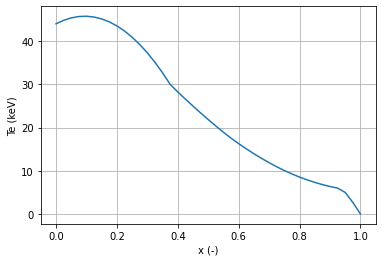

Fusion power [MW]: 1696.8920057
Additional heating power [MW]: 130.0
Radiation power [MW]: 286.4193059
Transport power across separatrix [MW]: 183.09792599000002
Plasma safety factor [-]: q_95 = 4.175627937
    {'PLASMOD': {'name': 'q95', 'recv': True, 'send': True, 'unit': None}}
Plasma current [MA]: I_p = 17.75
    {'PLASMOD': {'name': 'Ip', 'recv': True, 'send': True, 'unit': None}}
Normalised internal plasma inductance [-]: l_i = 1.6295145875
    {'PLASMOD': {'name': 'rli', 'recv': True, 'send': False, 'unit': None}}
Loop voltage during burn [V]: v_burn = 0.0046988593843
    {'PLASMOD': {'name': 'v_loop', 'recv': True, 'send': True, 'unit': None}}
Effective particle radiation atomic mass [u]: Z_eff = 1.8106751932
    {'PLASMOD': {'name': 'Zeff', 'recv': True, 'send': False, 'unit': None}}
H-factor [-]: 1.1
Divertor challenging criterion (P_sep * Bt /(q95 * R0 * A)) [-]: 9.2
H-mode operating regime f_LH = P_sep/P_LH [-]: 1.7175615843993557
Energy confinement time [s]: tau_e = 3.0341

In [12]:
plot_profile(plasmod_solver, "Te", "keV")
print_outputs(plasmod_solver)

### Rerunning with modified settings
#### Changing the transport model

In [13]:
plasmod_solver.problem_settings["i_modeltype"] = "GYROBOHM_2"
plasmod_solver.run()
print_outputs(plasmod_solver)

+-------------------------------------------------------------------------+
| Mode: run                                                               |
+-------------------------------------------------------------------------+
+-------------------------------------------------------------------------+
| Loading default values from json: /Users/tiago/Documents/VSCODE/bluem   |
| ira/bluemira/codes/plasmod/PLASMOD_DEFAULT_OUT.json                     |
+-------------------------------------------------------------------------+
+-------------------------------------------------------------------------+
| Comment stripped JSON                                                   |
| {                                                                       |
|                                                                         |
| "amin": null,                                                           |
| "d": null,                                                              |
| "k": null,

Fusion power [MW]: 1657.7132945
Additional heating power [MW]: 130.0
Radiation power [MW]: 282.29703344
Transport power across separatrix [MW]: 179.38231082
Plasma safety factor [-]: q_95 = 4.0908917148
    {'PLASMOD': {'name': 'q95', 'recv': True, 'send': True, 'unit': None}}
Plasma current [MA]: I_p = 17.75
    {'PLASMOD': {'name': 'Ip', 'recv': True, 'send': True, 'unit': None}}
Normalised internal plasma inductance [-]: l_i = 1.5807733356
    {'PLASMOD': {'name': 'rli', 'recv': True, 'send': False, 'unit': None}}
Loop voltage during burn [V]: v_burn = 0.0071309323473
    {'PLASMOD': {'name': 'v_loop', 'recv': True, 'send': True, 'unit': None}}
Effective particle radiation atomic mass [u]: Z_eff = 1.7918272868
    {'PLASMOD': {'name': 'Zeff', 'recv': True, 'send': False, 'unit': None}}
H-factor [-]: 1.0416991741
Divertor challenging criterion (P_sep * Bt /(q95 * R0 * A)) [-]: 9.2
H-mode operating regime f_LH = P_sep/P_LH [-]: 1.667400800514259
Energy confinement time [s]: tau_e = 2.

#### Fixing fusion power to 2000 MW and safety factor `q_95` to 3.5.
Plasmod calculates the additional heating power and the plasma current

In [14]:
plasmod_solver.params.q_95 = (3.5, "input")

plasmod_solver.problem_settings["pfus_req"] = 2000.0
plasmod_solver.problem_settings["i_equiltype"] = "q95_sawtooth"
plasmod_solver.problem_settings["q_control"] = 50.0

plasmod_solver.run()
print_outputs(plasmod_solver)

+-------------------------------------------------------------------------+
| Consider using a dictionary for ordering safety                         |
+-------------------------------------------------------------------------+
+-------------------------------------------------------------------------+
| Mode: run                                                               |
+-------------------------------------------------------------------------+
+-------------------------------------------------------------------------+
| Loading default values from json: /Users/tiago/Documents/VSCODE/bluem   |
| ira/bluemira/codes/plasmod/PLASMOD_DEFAULT_OUT.json                     |
+-------------------------------------------------------------------------+
+-------------------------------------------------------------------------+
| Comment stripped JSON                                                   |
| {                                                                       |
|           

Fusion power [MW]: 2002.2919674000002
Additional heating power [MW]: 87.97025723
Radiation power [MW]: 335.23456039999996
Transport power across separatrix [MW]: 153.47218446000002
Plasma safety factor [-]: q_95 = 3.5
    {'PLASMOD': {'name': 'q95', 'recv': True, 'send': True, 'unit': None}}
Plasma current [MA]: I_p = 20.364386871
    {'PLASMOD': {'name': 'Ip', 'recv': True, 'send': True, 'unit': None}}
Normalised internal plasma inductance [-]: l_i = 1.4895872061
    {'PLASMOD': {'name': 'rli', 'recv': True, 'send': False, 'unit': None}}
Loop voltage during burn [V]: v_burn = 0.015294081144
    {'PLASMOD': {'name': 'v_loop', 'recv': True, 'send': True, 'unit': None}}
Effective particle radiation atomic mass [u]: Z_eff = 1.77801018
    {'PLASMOD': {'name': 'Zeff', 'recv': True, 'send': False, 'unit': None}}
H-factor [-]: 0.96818371694
Divertor challenging criterion (P_sep * Bt /(q95 * R0 * A)) [-]: 9.2
H-mode operating regime f_LH = P_sep/P_LH [-]: 1.314883385042712
Energy confinement 

#### Setting heat flux on divertor target to 10 MW/m²
plasmod calculates the argon concentration to fulfill the constraint

In [15]:
plasmod_solver.problem_settings["qdivt_sup"] = 10.0
plasmod_solver.run()
print_outputs(plasmod_solver)

+-------------------------------------------------------------------------+
| Mode: run                                                               |
+-------------------------------------------------------------------------+
+-------------------------------------------------------------------------+
| Loading default values from json: /Users/tiago/Documents/VSCODE/bluem   |
| ira/bluemira/codes/plasmod/PLASMOD_DEFAULT_OUT.json                     |
+-------------------------------------------------------------------------+
+-------------------------------------------------------------------------+
| Comment stripped JSON                                                   |
| {                                                                       |
|                                                                         |
| "amin": null,                                                           |
| "d": null,                                                              |
| "k": null,

Fusion power [MW]: 2002.3354035
Additional heating power [MW]: 104.50864004
Radiation power [MW]: 351.78105966000004
Transport power across separatrix [MW]: 153.47218446000002
Plasma safety factor [-]: q_95 = 3.5
    {'PLASMOD': {'name': 'q95', 'recv': True, 'send': True, 'unit': None}}
Plasma current [MA]: I_p = 20.45491157
    {'PLASMOD': {'name': 'Ip', 'recv': True, 'send': True, 'unit': None}}
Normalised internal plasma inductance [-]: l_i = 1.5152961331
    {'PLASMOD': {'name': 'rli', 'recv': True, 'send': False, 'unit': None}}
Loop voltage during burn [V]: v_burn = 0.015820708967
    {'PLASMOD': {'name': 'v_loop', 'recv': True, 'send': True, 'unit': None}}
Effective particle radiation atomic mass [u]: Z_eff = 2.1137150116
    {'PLASMOD': {'name': 'Zeff', 'recv': True, 'send': False, 'unit': None}}
H-factor [-]: 0.96597239129
Divertor challenging criterion (P_sep * Bt /(q95 * R0 * A)) [-]: 9.2
H-mode operating regime f_LH = P_sep/P_LH [-]: 1.3116467029031458
Energy confinement tim

#### Changing the mapping sending or recieving
The mapping can be changed on a given parameter or set of parameters.
Notice how the value of `q_95` doesn't change in the output
even though its value has in the parameter (the previous value of 3.5 is used).

In [16]:
plasmod_solver.modify_mappings({"q_95": {"send": False}})
plasmod_solver.params.q_95 = (5, "input")
plasmod_solver.run()
print_outputs(plasmod_solver)
print("\nq_95 value history\n", plasmod_solver.params.q_95.history())

+-------------------------------------------------------------------------+
| Consider using a dictionary for ordering safety                         |
+-------------------------------------------------------------------------+
+-------------------------------------------------------------------------+
| Mode: run                                                               |
+-------------------------------------------------------------------------+
+-------------------------------------------------------------------------+
| Loading default values from json: /Users/tiago/Documents/VSCODE/bluem   |
| ira/bluemira/codes/plasmod/PLASMOD_DEFAULT_OUT.json                     |
+-------------------------------------------------------------------------+
+-------------------------------------------------------------------------+
| Comment stripped JSON                                                   |
| {                                                                       |
|           

Fusion power [MW]: 2002.3354035
Additional heating power [MW]: 104.50864004
Radiation power [MW]: 351.78105966000004
Transport power across separatrix [MW]: 153.47218446000002
Plasma safety factor [-]: q_95 = 3.5
    {'PLASMOD': {'name': 'q95', 'recv': True, 'send': False, 'unit': None}}
Plasma current [MA]: I_p = 20.45491157
    {'PLASMOD': {'name': 'Ip', 'recv': True, 'send': True, 'unit': None}}
Normalised internal plasma inductance [-]: l_i = 1.5152961331
    {'PLASMOD': {'name': 'rli', 'recv': True, 'send': False, 'unit': None}}
Loop voltage during burn [V]: v_burn = 0.015820708967
    {'PLASMOD': {'name': 'v_loop', 'recv': True, 'send': True, 'unit': None}}
Effective particle radiation atomic mass [u]: Z_eff = 2.1137150116
    {'PLASMOD': {'name': 'Zeff', 'recv': True, 'send': False, 'unit': None}}
H-factor [-]: 0.96597239129
Divertor challenging criterion (P_sep * Bt /(q95 * R0 * A)) [-]: 9.2
H-mode operating regime f_LH = P_sep/P_LH [-]: 1.3116467029031458
Energy confinement ti